In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df = df.drop(columns=["id", "Unnamed: 32"])

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [7]:
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

In [8]:
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


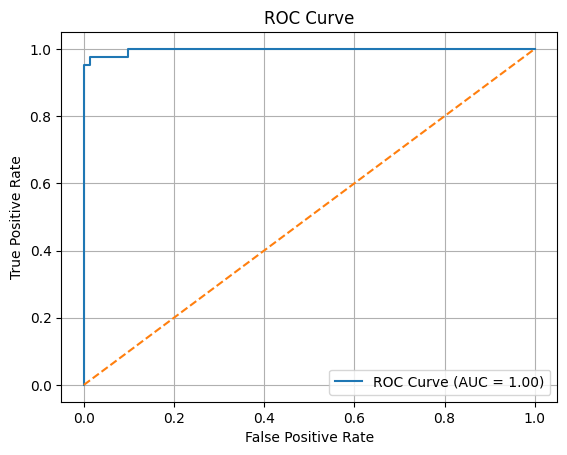

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [10]:
threshold = 0.3
y_custom = (y_proba >= threshold).astype(int)
custom_precision = precision_score(y_test, y_custom)
custom_recall = recall_score(y_test, y_custom)

print(f"\nCustom Threshold = {threshold}")
print("Precision:", custom_precision)
print("Recall:", custom_recall)


Custom Threshold = 0.3
Precision: 0.9130434782608695
Recall: 0.9767441860465116
